# TripAdvisor Review Crawling


In [3]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import time
# 에러 무시 코드 
import warnings
warnings.filterwarnings("ignore")

# 엑셀 데이터 불러오기

In [351]:
df = pd.read_excel("싱가폴 항공 리뷰 엑셀파일 정리(영어리뷰2천개)+한글리뷰v1.xlsx")
df.head(5)

,ID,review num,항공사,언어,클라스,총점,출발지,도착지,탑승년,탑승월,1. Legroom,2. Entertaiment,3. Value,4. Chech&Bording,5. Seat,6. Customer Service,7. Cleanliness,8. F&B,Review
0,1,1,2,1,1,5,Sydney,Ko Samui,2019.0,12.0,5,5,5,0,5,5,0.0,0.0,The best first class I’ve experienced \n\n\n\n...
1,2,2,2,1,1,5,Sydney,Singapore,2020.0,2.0,5,4,5,5,5,5,5.0,5.0,"A perfect, truly 5-star flight. From the momen..."
2,3,3,2,1,1,5,Singapore,Mumbai,2020.0,1.0,5,5,4,5,5,5,5.0,4.0,"New A380 suite is amazing. Space, seat and bed..."
3,4,4,2,1,1,5,singapore,Sydney,2020.0,2.0,5,5,5,5,5,5,5.0,5.0,"A true first class experience, right from the ..."
4,5,5,2,1,1,5,Perth,Tokyo,2020.0,1.0,5,5,4,5,5,5,5.0,5.0,Perth to Singapore leg was Business class as n...


In [353]:
df.columns

Index(['ID', 'review num', '항공사', '언어', '클라스', '총점', '출발지', '도착지', '탑승년',
       '탑승월', '1. Legroom', '2. Entertaiment', '3. Value', '4. Chech&Bording',
       '5. Seat', '6. Customer Service', '7. Cleanliness', '8. F&B', 'Review'],
      dtype='object')

# 크롤링

In [48]:
# 웹드라이브로 크롬브라우즈 띄운다.
driver_path = "driver/chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)

In [49]:
# 트립어드바이저로 이동
url_page = 'https://www.tripadvisor.com/Airline_Review-d8729151-Reviews-Singapore-Airlines'
driver.get(url_page)

In [32]:
#  Excellent 클릭
driver.find_element_by_xpath(
    '//*[@id="component_1"]/div/div[5]/div/div/div/div[2]/div[1]/div[2]/div/div[1]/div[1]/div[1]/ul/li[1]/label').click()

In [33]:
# First Class 클릭
driver.find_element_by_xpath(
    '//*[@id="component_1"]/div/div[5]/div/div/div[1]/div[2]/div[1]/div[2]/div/div[1]/div[1]/div[3]/ul/li[4]/label').click()

In [677]:
# Read More 클릭
driver.find_element_by_xpath(
    '//*[@id="component_1"]/div/div[5]/div/div/div/div[2]/div[1]/div[2]/div/div[3]/div[3]/div[3]/div[1]/div[2]/div/span[1]').click()


In [575]:
# 페이지 정보 가져오기
html = driver.page_source
soup = BeautifulSoup(html, "lxml")

#  리뷰 총점: 
- bubble_rating 50 = 5 / 40 = 4 ...

In [577]:
soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[0].find_all("div","emWez F1")

[<div class="emWez F1" data-test-target="review-rating"><span class="ui_bubble_rating bubble_50"></span></div>]

In [578]:
int(soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[0].find_all("div","emWez F1")[0].find("span").get("class")[1].split("_")[1])/10

5.0

In [579]:
for i in range(5):
    print()
    print(i,"번 승객리뷰")
    review_cnt = int(soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","emWez F1")[0].find("span").get("class")[1].split("_")[1])/10
    print(review_cnt)


0 번 승객리뷰
5.0

1 번 승객리뷰
5.0

2 번 승객리뷰
5.0

3 번 승객리뷰
5.0

4 번 승객리뷰
5.0


# 출발지 / 도착지 정보

In [580]:
soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[0].find_all("div","edfJp n R2 S2")

[<div class="edfJp n R2 S2">Singapore - Sydney</div>,
 <div class="edfJp n R2 S2">International</div>,
 <div class="edfJp n R2 S2">First Class</div>]

In [581]:
soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[0].find_all("div","edfJp n R2 S2")[0].text.split(" - ")

['Singapore', 'Sydney']

In [582]:
for i in range(5):
    print()
    print(i,"번 승객리뷰")
    depart_loc = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","edfJp n R2 S2")[0].text.split(" - ")[0]
    arrive_loc = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","edfJp n R2 S2")[0].text.split(" - ")[1]
    print(depart_loc,arrive_loc)


0 번 승객리뷰
Singapore Sydney

1 번 승객리뷰
Sydney Ko Samui

2 번 승객리뷰
Sydney Singapore

3 번 승객리뷰
Singapore Mumbai

4 번 승객리뷰
Singapore Sydney


# 탑승년/월 정보

In [583]:
soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[0].find_all("span","euPKI _R Me S4 H3")

[<span class="euPKI _R Me S4 H3"><span class="CrxzX">Date of travel:</span> September 2021</span>]

In [584]:
soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[0].find_all("span","euPKI _R Me S4 H3")[0].text.split(" ")

['Date', 'of', 'travel:', 'September', '2021']

In [585]:
for i in range(5):
    print()
    print(i,"번 승객리뷰")
    depart_year = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("span","euPKI _R Me S4 H3")[0].text.split(" ")[-1]
    depart_month = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("span","euPKI _R Me S4 H3")[0].text.split(" ")[-2]
    print(depart_year,depart_month)


0 번 승객리뷰
2021 September

1 번 승객리뷰
2019 December

2 번 승객리뷰
2020 February

3 번 승객리뷰
2020 January

4 번 승객리뷰
2020 February


# 상세 리뷰 점수

In [586]:
# 리뷰가 없는 곳은 [] Nan
soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[0].find_all("div","cnFkU Me f")

[]

In [587]:
soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[1].find_all("div","cnFkU Me f")[0].find_all("span")

[<span class="YDXMO Nd"><span class="ui_bubble_rating bubble_50"></span></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span>Legroom</span>,
 <span class="YDXMO Nd"><span class="ui_bubble_rating bubble_50"></span></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span>Seat comfort</span>,
 <span class="YDXMO Nd"><span class="ui_bubble_rating bubble_50"></span></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span>In-flight Entertainment</span>,
 <span class="YDXMO Nd"><span class="ui_bubble_rating bubble_50"></span></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span>Customer service</span>,
 <span class="YDXMO Nd"><span class="ui_bubble_rating bubble_50"></span></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span>Value for money</span>]

In [588]:
soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[1].find_all("div","cnFkU Me f")[0].find_all("span")[2].text

'Legroom'

In [589]:
int(soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[1].find_all("div","cnFkU Me f")[0].find_all("span")[1].get("class")[1].split("_")[1])/10

5.0

In [590]:
soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[1].find_all("div","cnFkU Me f")[0].find_all("span")[5].text

'Seat comfort'

In [591]:
int(soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[1].find_all("div","cnFkU Me f")[0].find_all("span")[4].get("class")[1].split("_")[1])/10

5.0

In [592]:
len(soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[1].find_all("div","cnFkU Me f")[0].find_all("span"))//3

5

In [593]:
for i in range(len(soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[1].find_all("div","cnFkU Me f")[0].find_all("span"))//3):
    review_info = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[1].find_all("div","cnFkU Me f")[0].find_all("span")[i*3+2].text
    review_point = int(soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[1].find_all("div","cnFkU Me f")[0].find_all("span")[i*3+1].get("class")[1].split("_")[1])/10
    print(review_info,review_point)

Legroom 5.0
Seat comfort 5.0
In-flight Entertainment 5.0
Customer service 5.0
Value for money 5.0


In [594]:
soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[0].find_all("div","cnFkU Me f") == []

True

In [595]:
for j in range(5):
    print()
    print(j,"번 승객리뷰")
    if soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[j].find_all("div","cnFkU Me f") != []:
        for i in range(len(soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[j].find_all("div","cnFkU Me f")[0].find_all("span"))//3):
            review_info = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[j].find_all("div","cnFkU Me f")[0].find_all("span")[i*3+2].text
            review_point = int(soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[j].find_all("div","cnFkU Me f")[0].find_all("span")[i*3+1].get("class")[1].split("_")[1])/10
            print(review_info,review_point)
    


0 번 승객리뷰

1 번 승객리뷰
Legroom 5.0
Seat comfort 5.0
In-flight Entertainment 5.0
Customer service 5.0
Value for money 5.0

2 번 승객리뷰
Legroom 5.0
Seat comfort 5.0
In-flight Entertainment 4.0
Customer service 5.0
Value for money 5.0
Cleanliness 5.0
Check-in and boarding 5.0
Food and Beverage 5.0

3 번 승객리뷰
Legroom 5.0
Seat comfort 5.0
In-flight Entertainment 5.0
Customer service 5.0
Value for money 4.0
Cleanliness 5.0
Check-in and boarding 5.0
Food and Beverage 4.0

4 번 승객리뷰
Legroom 5.0
Seat comfort 5.0
In-flight Entertainment 5.0
Customer service 5.0
Value for money 5.0
Cleanliness 5.0
Check-in and boarding 5.0
Food and Beverage 5.0


# 리뷰 글

In [596]:
soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[1].find_all("q","XllAv H4 _a")

[<q class="XllAv H4 _a"><span>Everything was perfect<br/><br/>Service is amazing. Food brilliant with amazing wine list. <br/><br/>Bed was comfortable and possibly best sleep I’ve had on a plane. <br/><br/>Could not fault.</span></q>]

In [597]:
for i in range(5):
    review = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("q","XllAv H4 _a")[0].text
    print()
    print(i,"번 승객리뷰")
    print(review)


0 번 승객리뷰
Cabin - stunning puts its rivals to bed & keeps Singapore miles ahead. First class new suite. Stunning

1 번 승객리뷰
Everything was perfectService is amazing. Food brilliant with amazing wine list. Bed was comfortable and possibly best sleep I’ve had on a plane. Could not fault.

2 번 승객리뷰
A perfect, truly 5-star flight. From the moment I entered the aircraft, the cabin crew, in this case Leading Stewardess Oy Mei Yen and Leading Steward Steven Goh, were utmost professional and welcoming. Although they were extremely efficient, what most impressed me about them was their genuine commitment to look after passengers from the heart. I strongly recommend Singapore Airlines and its amazing crews!

3 번 승객리뷰
New A380 suite is amazing. Space, seat and bed are unbeatable. Thanks for all the crews providing this unforgettable trip.

4 번 승객리뷰
A true first class experience, right from the private entry at Changi airport and express customs. The Private lounge for suite travelers in Singapore 

In [678]:
df = pd.DataFrame()
# 페이지 정보 가져오기
html = driver.page_source
soup = BeautifulSoup(html, "lxml")

for i in range(5):
    leg = 0
    seat = 0
    enter = 0
    serv = 0
    value = 0
    clean = 0
    check = 0
    food = 0
    
    review_cnt = int(soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","emWez F1")[0].find("span").get("class")[1].split("_")[1])/10
    depart_loc = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","edfJp n R2 S2")[0].text.split(" - ")[0]
    arrive_loc = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","edfJp n R2 S2")[0].text.split(" - ")[1]
    depart_year = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("span","euPKI _R Me S4 H3")[0].text.split(" ")[-1]
    depart_month = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("span","euPKI _R Me S4 H3")[0].text.split(" ")[-2]
    if soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","cnFkU Me f") != []:
        for j in range(len(soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","cnFkU Me f")[0].find_all("span"))//3):
            review_info = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","cnFkU Me f")[0].find_all("span")[j*3+2].text
            review_point = int(soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","cnFkU Me f")[0].find_all("span")[j*3+1].get("class")[1].split("_")[1])/10
            if review_info == 'Legroom':
                leg = review_point
            elif review_info == 'Seat comfort':
                seat = review_point
            elif review_info == 'In-flight Entertainment':
                enter = review_point
            elif review_info == 'Customer service': 
                serv = review_point
            elif review_info == 'Value for money': 
                value = review_point
            elif review_info == 'Cleanliness': 
                clean = review_point
            elif review_info == 'Check-in and boarding':
                check = review_point
            elif review_info == 'Food and Beverage': 
                food = review_point
    review = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("q","XllAv H4 _a")[0].text
        
    new_row = {'ID':i, 'review num':i, '항공사':2, '언어':1, '클라스':1, '총점':review_cnt, '출발지':depart_loc, 
               '도착지':arrive_loc, '탑승년':depart_year, '탑승월':depart_month, 
               '1. Legroom':leg, '2. Entertaiment':enter, '3. Value':value, '4. Chech&Bording':check,
           '5. Seat':seat, '6. Customer Service':serv, '7. Cleanliness':clean, '8. F&B':food, 'Review':review}
    df = df.append(new_row, ignore_index=True)

In [679]:
df[['ID', 'review num', '항공사', '언어', '클라스', '총점', '출발지', '도착지', '탑승년',
       '탑승월', '1. Legroom', '2. Entertaiment', '3. Value', '4. Chech&Bording',
       '5. Seat', '6. Customer Service', '7. Cleanliness', '8. F&B', 'Review']]

,ID,review num,항공사,언어,클라스,총점,출발지,도착지,탑승년,탑승월,1. Legroom,2. Entertaiment,3. Value,4. Chech&Bording,5. Seat,6. Customer Service,7. Cleanliness,8. F&B,Review
0,0.0,0.0,2.0,1.0,1.0,5.0,Singapore,Sydney,2021,September,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cabin - stunning puts its rivals to bed & keep...
1,1.0,1.0,2.0,1.0,1.0,5.0,Sydney,Ko Samui,2019,December,5.0,5.0,5.0,0.0,5.0,5.0,0.0,0.0,Everything was perfectService is amazing. Food...
2,2.0,2.0,2.0,1.0,1.0,5.0,Sydney,Singapore,2020,February,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,"A perfect, truly 5-star flight. From the momen..."
3,3.0,3.0,2.0,1.0,1.0,5.0,Singapore,Mumbai,2020,January,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,"New A380 suite is amazing. Space, seat and bed..."
4,4.0,4.0,2.0,1.0,1.0,5.0,Singapore,Sydney,2020,February,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,"A true first class experience, right from the ..."


# 페이지 넘기기

In [680]:
# 두번째 페이지 클릭
driver.find_element_by_xpath(
    '//*[@id="component_1"]/div/div[5]/div/div/div/div[2]/div[1]/div[2]/div/div[8]/div/div/a[1]').click()


In [681]:
# Read More 클릭
driver.find_element_by_xpath(
    '//*[@id="component_1"]/div/div[5]/div/div/div[1]/div[2]/div[1]/div[2]/div/div[3]/div[2]/div[3]/div[1]/div[2]/div/span[1]').click()

In [682]:
# 페이지 정보 가져오기
html = driver.page_source
soup = BeautifulSoup(html, "lxml")

for i in range(5):
    leg = 0
    seat = 0
    enter = 0
    serv = 0
    value = 0
    clean = 0
    check = 0
    food = 0
    
    review_cnt = int(soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","emWez F1")[0].find("span").get("class")[1].split("_")[1])/10
    depart_loc = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","edfJp n R2 S2")[0].text.split(" - ")[0]
    arrive_loc = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","edfJp n R2 S2")[0].text.split(" - ")[1]
    depart_year = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("span","euPKI _R Me S4 H3")[0].text.split(" ")[-1]
    depart_month = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("span","euPKI _R Me S4 H3")[0].text.split(" ")[-2]
    if soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","cnFkU Me f") != []:
        for j in range(len(soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","cnFkU Me f")[0].find_all("span"))//3):
            review_info = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","cnFkU Me f")[0].find_all("span")[j*3+2].text
            review_point = int(soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","cnFkU Me f")[0].find_all("span")[j*3+1].get("class")[1].split("_")[1])/10
            if review_info == 'Legroom':
                leg = review_point
            elif review_info == 'Seat comfort':
                seat = review_point
            elif review_info == 'In-flight Entertainment':
                enter = review_point
            elif review_info == 'Customer service': 
                serv = review_point
            elif review_info == 'Value for money': 
                value = review_point
            elif review_info == 'Cleanliness': 
                clean = review_point
            elif review_info == 'Check-in and boarding':
                check = review_point
            elif review_info == 'Food and Beverage': 
                food = review_point
    review = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("q","XllAv H4 _a")[0].text
        
    new_row = {'ID':i, 'review num':i, '항공사':2, '언어':1, '클라스':1, '총점':review_cnt, '출발지':depart_loc, 
               '도착지':arrive_loc, '탑승년':depart_year, '탑승월':depart_month, 
               '1. Legroom':leg, '2. Entertaiment':enter, '3. Value':value, '4. Chech&Bording':check,
           '5. Seat':seat, '6. Customer Service':serv, '7. Cleanliness':clean, '8. F&B':food, 'Review':review}
    df = df.append(new_row, ignore_index=True)

In [683]:
df[['ID', 'review num', '항공사', '언어', '클라스', '총점', '출발지', '도착지', '탑승년',
       '탑승월', '1. Legroom', '2. Entertaiment', '3. Value', '4. Chech&Bording',
       '5. Seat', '6. Customer Service', '7. Cleanliness', '8. F&B', 'Review']]

,ID,review num,항공사,언어,클라스,총점,출발지,도착지,탑승년,탑승월,1. Legroom,2. Entertaiment,3. Value,4. Chech&Bording,5. Seat,6. Customer Service,7. Cleanliness,8. F&B,Review
0,0.0,0.0,2.0,1.0,1.0,5.0,Singapore,Sydney,2021,September,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cabin - stunning puts its rivals to bed & keep...
1,1.0,1.0,2.0,1.0,1.0,5.0,Sydney,Ko Samui,2019,December,5.0,5.0,5.0,0.0,5.0,5.0,0.0,0.0,Everything was perfectService is amazing. Food...
2,2.0,2.0,2.0,1.0,1.0,5.0,Sydney,Singapore,2020,February,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,"A perfect, truly 5-star flight. From the momen..."
3,3.0,3.0,2.0,1.0,1.0,5.0,Singapore,Mumbai,2020,January,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,"New A380 suite is amazing. Space, seat and bed..."
4,4.0,4.0,2.0,1.0,1.0,5.0,Singapore,Sydney,2020,February,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,"A true first class experience, right from the ..."
5,0.0,0.0,2.0,1.0,1.0,5.0,Perth,Tokyo,2020,January,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,Perth to Singapore leg was Business class as n...
6,1.0,1.0,2.0,1.0,1.0,5.0,London,Singapore,2019,October,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Our first time using the Singapore suites and ...
7,2.0,2.0,2.0,1.0,1.0,5.0,Frankfurt,Singapore,2019,December,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,"Absolutely amazing flight, flew in one of the ..."
8,3.0,3.0,2.0,1.0,1.0,5.0,Copenhagen,Singapore,2019,August,5.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,"Amazing service, best seats ever. To sleep and..."
9,4.0,4.0,2.0,1.0,1.0,5.0,Melbourne,Ho Chi Minh City,2019,December,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,Here goes.Online booking of flight - Excellent...


# Try Catch문 : 계속 하면 에러가 남으로 Try로 해봄

In [684]:
try:
    driver.find_element_by_xpath(
        '//*[@id="component_1"]/div/div[5]/div/div/div[1]/div[2]/div[1]/div[2]/div/div[8]/div/a[2]').click()

except:
    print("end")

In [685]:
try:
    driver.find_element_by_xpath(
'//*[@id="component_1"]/div/div[5]/div/div/div[1]/div[2]/div[1]/div[2]/div/div[3]/div[2]/div[3]/div[1]/div[2]/div/span[1]').click()

except:
    print("No Read More")


In [686]:
# 페이지 정보 가져오기
html = driver.page_source
soup = BeautifulSoup(html, "lxml")

for i in range(5):
    leg = 0
    seat = 0
    enter = 0
    serv = 0
    value = 0
    clean = 0
    check = 0
    food = 0

    
    review_cnt = int(soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","emWez F1")[0].find("span").get("class")[1].split("_")[1])/10
    depart_loc = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","edfJp n R2 S2")[0].text.split(" - ")[0]
    arrive_loc = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","edfJp n R2 S2")[0].text.split(" - ")[1]
    try:
        depart_year = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("span","euPKI _R Me S4 H3")[0].text.split(" ")[-1]
        depart_month = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("span","euPKI _R Me S4 H3")[0].text.split(" ")[-2]
    except:
        depart_year = 0
        depart_month = 0
    if soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","cnFkU Me f") != []:
        for j in range(len(soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","cnFkU Me f")[0].find_all("span"))//3):
            review_info = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","cnFkU Me f")[0].find_all("span")[j*3+2].text
            review_point = int(soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","cnFkU Me f")[0].find_all("span")[j*3+1].get("class")[1].split("_")[1])/10
            if review_info == 'Legroom':
                leg = review_point
            elif review_info == 'Seat comfort':
                seat = review_point
            elif review_info == 'In-flight Entertainment':
                enter = review_point
            elif review_info == 'Customer service': 
                serv = review_point
            elif review_info == 'Value for money': 
                value = review_point
            elif review_info == 'Cleanliness': 
                clean = review_point
            elif review_info == 'Check-in and boarding':
                check = review_point
            elif review_info == 'Food and Beverage': 
                food = review_point
    review = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("q","XllAv H4 _a")[0].text
        
    new_row = {'ID':i, 'review num':i, '항공사':2, '언어':1, '클라스':1, '총점':review_cnt, '출발지':depart_loc, 
               '도착지':arrive_loc, '탑승년':depart_year, '탑승월':depart_month, 
               '1. Legroom':leg, '2. Entertaiment':enter, '3. Value':value, '4. Chech&Bording':check,
           '5. Seat':seat, '6. Customer Service':serv, '7. Cleanliness':clean, '8. F&B':food, 'Review':review}
    df = df.append(new_row, ignore_index=True)

In [687]:
df[['ID', 'review num', '항공사', '언어', '클라스', '총점', '출발지', '도착지', '탑승년',
       '탑승월', '1. Legroom', '2. Entertaiment', '3. Value', '4. Chech&Bording',
       '5. Seat', '6. Customer Service', '7. Cleanliness', '8. F&B', 'Review']]

,ID,review num,항공사,언어,클라스,총점,출발지,도착지,탑승년,탑승월,1. Legroom,2. Entertaiment,3. Value,4. Chech&Bording,5. Seat,6. Customer Service,7. Cleanliness,8. F&B,Review
0,0.0,0.0,2.0,1.0,1.0,5.0,Singapore,Sydney,2021,September,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cabin - stunning puts its rivals to bed & keep...
1,1.0,1.0,2.0,1.0,1.0,5.0,Sydney,Ko Samui,2019,December,5.0,5.0,5.0,0.0,5.0,5.0,0.0,0.0,Everything was perfectService is amazing. Food...
2,2.0,2.0,2.0,1.0,1.0,5.0,Sydney,Singapore,2020,February,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,"A perfect, truly 5-star flight. From the momen..."
3,3.0,3.0,2.0,1.0,1.0,5.0,Singapore,Mumbai,2020,January,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,"New A380 suite is amazing. Space, seat and bed..."
4,4.0,4.0,2.0,1.0,1.0,5.0,Singapore,Sydney,2020,February,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,"A true first class experience, right from the ..."
5,0.0,0.0,2.0,1.0,1.0,5.0,Perth,Tokyo,2020,January,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,Perth to Singapore leg was Business class as n...
6,1.0,1.0,2.0,1.0,1.0,5.0,London,Singapore,2019,October,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Our first time using the Singapore suites and ...
7,2.0,2.0,2.0,1.0,1.0,5.0,Frankfurt,Singapore,2019,December,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,"Absolutely amazing flight, flew in one of the ..."
8,3.0,3.0,2.0,1.0,1.0,5.0,Copenhagen,Singapore,2019,August,5.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,"Amazing service, best seats ever. To sleep and..."
9,4.0,4.0,2.0,1.0,1.0,5.0,Melbourne,Ho Chi Minh City,2019,December,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,Here goes.Online booking of flight - Excellent...


# 함수만들기

In [2]:
def next_page():
    try:
        driver.find_element_by_xpath(
        '//*[@id="component_1"]/div/div[5]/div/div/div[1]/div[2]/div[1]/div[2]/div/div[8]/div/a[2]').click()
        print("Next Page Complete")
    except:
        print("Failed Next page")
        return "err"

In [3]:
def second_next_page():
    try:
        driver.find_element_by_xpath(
    '//*[@id="component_1"]/div/div[5]/div/div/div/div[2]/div[1]/div[2]/div/div[8]/div/div/a[1]').click()
        print("Second Next Page Complete")
    except:
        print("Failed Second Next page")
        return True

In [4]:
def first_read_more():
    time.sleep(1.5)
    try:
        # Read More 클릭
        driver.find_element_by_xpath(
'//*[@id="component_1"]/div/div[5]/div/div/div/div[2]/div[1]/div[2]/div/div[3]/div[3]/div[3]/div[1]/div[2]/div/span[1]').click()
        print("First Read More Complete")
    except:
        print("First Read More Failed")
        return True

In [5]:
def read_more():
    time.sleep(1.5)
    try:
        driver.find_element_by_xpath(
'//*[@id="component_1"]/div/div[5]/div/div/div[1]/div[2]/div[1]/div[2]/div/div[3]/div[2]/div[3]/div[1]/div[2]/div/span[1]').click()
        print("Read More Complete")
    except:
        print("Read More Failed")
        return "err"

In [24]:
def trip_review(num):
    global df
    # 페이지 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, "lxml")

    for i in range(len(soup.find_all("div","cqoFv _T"))):
        leg = 0
        seat = 0
        enter = 0
        serv = 0
        value = 0
        clean = 0
        check = 0
        food = 0

        try:
            review_cnt = int(soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","emWez F1")[0].find("span").get("class")[1].split("_")[1])/10
        except:
            review_cnt = 0
        try:
            depart_loc = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","edfJp n R2 S2")[0].text.split(" - ")[0]
            arrive_loc = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","edfJp n R2 S2")[0].text.split(" - ")[1]
        except:
            depart_loc = 0
            review_cnt = 0
        try:
            depart_year = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("span","euPKI _R Me S4 H3")[0].text.split(" ")[-1]
            depart_month = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("span","euPKI _R Me S4 H3")[0].text.split(" ")[-2]
        except:
            depart_year = 0
            depart_month = 0
        if soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","cnFkU Me f") != []:
            for j in range(len(soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","cnFkU Me f")[0].find_all("span"))//3):
                review_info = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","cnFkU Me f")[0].find_all("span")[j*3+2].text
                review_point = int(soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("div","cnFkU Me f")[0].find_all("span")[j*3+1].get("class")[1].split("_")[1])/10
                if review_info == 'Legroom':
                    leg = review_point
                elif review_info == 'Seat comfort':
                    seat = review_point
                elif review_info == 'In-flight Entertainment':
                    enter = review_point
                elif review_info == 'Customer service': 
                    serv = review_point
                elif review_info == 'Value for money': 
                    value = review_point
                elif review_info == 'Cleanliness': 
                    clean = review_point
                elif review_info == 'Check-in and boarding':
                    check = review_point
                elif review_info == 'Food and Beverage': 
                    food = review_point
        try:
            review = soup.find_all("div","eVykL Gi z cPeBe MD cwpFC")[i].find_all("q","XllAv H4 _a")[0].text
        except:
            review = 0

        new_row = {'ID':('00'+str((num-1)*5+i))[-3:], 'review num':(num-1)*5+i, '항공사':2, '언어':1, '클라스':1, '총점':review_cnt, '출발지':depart_loc, 
                   '도착지':arrive_loc, '탑승년':depart_year, '탑승월':depart_month, 
                   '1. Legroom':leg, '2. Entertaiment':enter, '3. Value':value, '4. Chech&Bording':check,
               '5. Seat':seat, '6. Customer Service':serv, '7. Cleanliness':clean, '8. F&B':food, 'Review':review}
        df = df.append(new_row, ignore_index=True)

In [25]:
# 웹드라이브로 크롬브라우즈 띄운다.
driver_path = "driver/chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)

# 트립어드바이저로 이동
url_page = 'https://www.tripadvisor.com/Airline_Review-d8729151-Reviews-Singapore-Airlines'
driver.get(url_page)



In [26]:
#  Excellent 클릭
driver.find_element_by_xpath(
    '//*[@id="component_1"]/div/div[5]/div/div/div/div[2]/div[1]/div[2]/div/div[1]/div[1]/div[1]/ul/li[1]/label').click()

# First Class 클릭
driver.find_element_by_xpath(
    '//*[@id="component_1"]/div/div[5]/div/div/div[1]/div[2]/div[1]/div[2]/div/div[1]/div[1]/div[3]/ul/li[4]/label').click()

In [27]:
df = pd.DataFrame()
df

""


In [28]:
i = 1
print("===========",i,"페이지================")
first_read_more()
trip_review(i)
i += 1
print("===========",i,"페이지================")
second_next_page()
read_more()
trip_review(i)
i += 1
while next_page() != 'err':
    print("===========",i,"페이지================")
    if read_more() == 'err':
        first_read_more()
    trip_review(i)
    i += 1

=========== 1 페이지================
First Read More Complete
=========== 2 페이지================
Second Next Page Complete
Read More Complete
Next Page Complete
=========== 3 페이지================
Read More Complete
Next Page Complete
=========== 4 페이지================
Read More Complete
Next Page Complete
=========== 5 페이지================
Read More Failed
First Read More Complete
Next Page Complete
=========== 6 페이지================
Read More Complete
Next Page Complete
=========== 7 페이지================
Read More Complete
Next Page Complete
=========== 8 페이지================
Read More Complete
Next Page Complete
=========== 9 페이지================
Read More Failed
First Read More Complete
Next Page Complete
=========== 10 페이지================
Read More Complete
Next Page Complete
=========== 11 페이지================
Read More Complete
Next Page Complete
=========== 12 페이지================
Read More Failed
First Read More Complete
Next Page Complete
=========== 13 페이지================
Read More Comple

In [29]:
df = df[['ID', 'review num', '항공사', '언어', '클라스', '총점', '출발지', '도착지', '탑승년',
       '탑승월', '1. Legroom', '2. Entertaiment', '3. Value', '4. Chech&Bording',
       '5. Seat', '6. Customer Service', '7. Cleanliness', '8. F&B', 'Review']]

In [30]:
df[['review num', '항공사', '언어', '클라스', '총점', '1. Legroom', '2. Entertaiment', '3. Value', '4. Chech&Bording',
       '5. Seat', '6. Customer Service', '7. Cleanliness', '8. F&B']]= df[['review num', '항공사', '언어', '클라스', '총점', '1. Legroom', '2. Entertaiment', '3. Value', '4. Chech&Bording',
       '5. Seat', '6. Customer Service', '7. Cleanliness', '8. F&B']].astype(int)

In [31]:
df

,ID,review num,항공사,언어,클라스,총점,출발지,도착지,탑승년,탑승월,1. Legroom,2. Entertaiment,3. Value,4. Chech&Bording,5. Seat,6. Customer Service,7. Cleanliness,8. F&B,Review
0,000,0,2,1,1,5,Singapore,Sydney,2021,September,0,0,0,0,0,0,0,0,Cabin - stunning puts its rivals to bed & keep...
1,001,1,2,1,1,5,Sydney,Ko Samui,2019,December,5,5,5,0,5,5,0,0,Everything was perfectService is amazing. Food...
2,002,2,2,1,1,5,Sydney,Singapore,2020,February,5,4,5,5,5,5,5,5,"A perfect, truly 5-star flight. From the momen..."
3,003,3,2,1,1,5,Singapore,Mumbai,2020,January,5,5,4,5,5,5,5,4,"New A380 suite is amazing. Space, seat and bed..."
4,004,4,2,1,1,5,Singapore,Sydney,2020,February,5,5,5,5,5,5,5,5,"A true first class experience, right from the ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,287,287,2,1,1,5,Tokyo,Singapore,2016,February,5,4,3,0,5,4,0,0,There was a lot of flak a year back when a blo...
288,288,288,2,1,1,5,Singapore,Hong Kong,2016,January,5,3,4,0,5,5,0,0,Service is top notch. Care in detail.Food and ...
289,289,289,2,1,1,5,Hong Kong,Singapore,2015,March,5,5,5,0,5,5,0,0,I had a little accident while boarding and sta...
290,290,290,2,1,1,5,Singapore,San Francisco,2015,December,5,4,4,0,5,5,0,0,SQ is still the best after years of patronage....


# CSV 파일로 저장

In [32]:
df.to_csv("tripadvisor_review.csv", encoding="utf-8-sig")

In [3]:
df = pd.read_csv("tripadvisor_review.csv", encoding="utf-8-sig")
df.head(5)

,Unnamed: 0,ID,review num,항공사,언어,클라스,총점,출발지,도착지,탑승년,탑승월,1. Legroom,2. Entertaiment,3. Value,4. Chech&Bording,5. Seat,6. Customer Service,7. Cleanliness,8. F&B,Review
0,0,0,0,2,1,1,5,Singapore,Sydney,2021,September,0,0,0,0,0,0,0,0,Cabin - stunning puts its rivals to bed & keep...
1,1,1,1,2,1,1,5,Sydney,Ko Samui,2019,December,5,5,5,0,5,5,0,0,Everything was perfectService is amazing. Food...
2,2,2,2,2,1,1,5,Sydney,Singapore,2020,February,5,4,5,5,5,5,5,5,"A perfect, truly 5-star flight. From the momen..."
3,3,3,3,2,1,1,5,Singapore,Mumbai,2020,January,5,5,4,5,5,5,5,4,"New A380 suite is amazing. Space, seat and bed..."
4,4,4,4,2,1,1,5,Singapore,Sydney,2020,February,5,5,5,5,5,5,5,5,"A true first class experience, right from the ..."


In [4]:
df["Review"]

0      Cabin - stunning puts its rivals to bed & keep...
1      Everything was perfectService is amazing. Food...
2      A perfect, truly 5-star flight. From the momen...
3      New A380 suite is amazing. Space, seat and bed...
4      A true first class experience, right from the ...
                             ...                        
287    There was a lot of flak a year back when a blo...
288    Service is top notch. Care in detail.Food and ...
289    I had a little accident while boarding and sta...
290    SQ is still the best after years of patronage....
291    Everyone was prompt, courteous and very respec...
Name: Review, Length: 292, dtype: object

In [5]:
import nltk
from nltk.corpus import stopwords   
stop = set(stopwords.words('english')) 
print(stop)

{'under', "she's", 'having', 'm', 'how', "didn't", 'the', 'he', 'few', 'y', 'before', 'isn', 'until', 'from', 'after', 'ours', 'very', "isn't", 'here', 'just', "it's", 'mightn', 'it', 'him', 'won', 'd', 'herself', 're', 'being', 'nor', 's', 'too', "you'd", 'this', "mustn't", 'that', 'his', 'above', 'but', 'again', 'any', "wouldn't", 'own', 'do', 'doesn', 'whom', 'doing', 'up', 'does', 'out', 'haven', 'our', "doesn't", "won't", "you're", 'you', 'such', 'himself', 'be', 'been', "weren't", 'over', 'when', 'aren', 'theirs', 'where', 'wasn', 'of', 'down', 'through', 'only', 'o', 'was', 'ma', "wasn't", 'hers', 'once', "hadn't", 'with', 'themselves', 'needn', 'has', 'into', 'will', 'we', "couldn't", 'have', "aren't", "needn't", 'should', 'didn', 'below', 'her', 'what', 'she', "that'll", 'them', 'its', "haven't", 'shan', 'shouldn', 'couldn', 'i', 'ourselves', 'wouldn', "hasn't", 'in', 'about', 'those', "shan't", 've', 'off', 'don', 'mustn', 'am', 'is', 'which', 'not', 'can', "don't", 'all', 'e

In [6]:
import re
temp =[]
snow = nltk.stem.SnowballStemmer('english')
for sentence in df["Review"]:
    sentence = sentence.lower()                 # Converting to lowercase
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, ' ', sentence)        #Removing HTML tags
    sentence = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence)        #Removing Punctuations
    
    words = [snow.stem(word) for word in sentence.split() if word not in stopwords.words('english')]   # Stemming and removing stopwords
    temp.append(words)
    
final_X = temp    

In [7]:
import collections
wordlist = []
for i in range(len(final_X)):
    for j in range(len(final_X[i])):
       wordlist.append(final_X[i][j])

counter = (collections.Counter(wordlist))
counter.most_common(50)

[('class', 300),
 ('singapor', 286),
 ('servic', 281),
 ('first', 280),
 ('flight', 277),
 ('airlin', 277),
 ('suit', 224),
 ('seat', 177),
 ('food', 163),
 ('bed', 135),
 ('loung', 129),
 ('great', 129),
 ('fli', 123),
 ('experi', 121),
 ('crew', 120),
 ('best', 115),
 ('one', 103),
 ('good', 101),
 ('sq', 96),
 ('comfort', 93),
 ('time', 92),
 ('cabin', 89),
 ('-', 85),
 ('staff', 80),
 ('excel', 77),
 ('travel', 74),
 ('busi', 73),
 ('privat', 71),
 ('board', 71),
 ('a380', 70),
 ('would', 66),
 ('amaz', 62),
 ('get', 62),
 ('way', 62),
 ('like', 60),
 ('room', 60),
 ('meal', 60),
 ('plane', 58),
 ('well', 57),
 ('even', 57),
 ('book', 54),
 ('realli', 52),
 ('alway', 50),
 ('check', 50),
 ('attent', 47),
 ('sleep', 46),
 ('use', 46),
 ('could', 44),
 ('trip', 44),
 ('us', 44)]

In [8]:
from wordcloud import WordCloud
words = dict(counter.most_common())

wordcloud = WordCloud(
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(words)

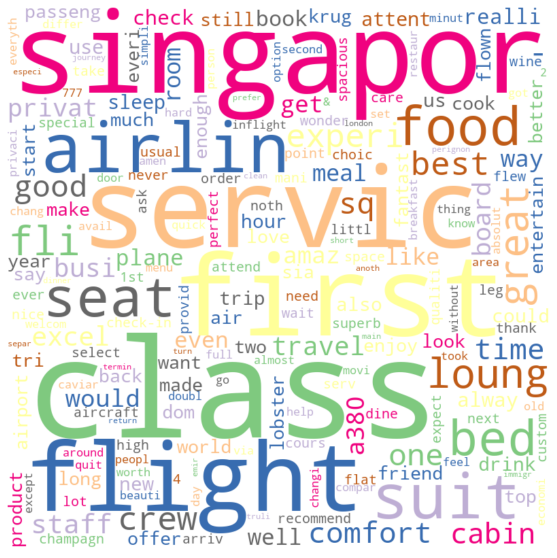

In [9]:
array = wordcloud_words.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()

In [10]:
import gensim
import pyLDAvis
from pyLDAvis import gensim_models

In [11]:
id2word = gensim.corpora.Dictionary(final_X)
texts=final_X.copy()
corpus = [id2word.doc2bow(text) for text in texts]
number= 2
model = gensim.models.ldamodel.LdaModel(
    corpus = corpus,
    id2word = id2word,
    num_topics = number,
    random_state = 1025
)

In [14]:
vis = pyLDAvis.gensim_models.prepare(model, corpus, id2word)
pyLDAvis.save_html(vis, 'Tripadvisor_LDA.html')
pyLDAvis.display(vis)